In [1]:
import pytearcat as pt
import sympy as sp

In [2]:
print(dir(sp))

['Abs', 'AccumBounds', 'Add', 'Adjoint', 'AlgebraicField', 'AlgebraicNumber', 'And', 'AppliedPredicate', 'Array', 'AssumptionsContext', 'Atom', 'AtomicExpr', 'BasePolynomialError', 'Basic', 'BlockDiagMatrix', 'BlockMatrix', 'CC', 'CRootOf', 'Catalan', 'Chi', 'Ci', 'Circle', 'CoercionFailed', 'Complement', 'ComplexField', 'ComplexRegion', 'ComplexRootOf', 'Complexes', 'ComputationFailed', 'ConditionSet', 'Contains', 'CosineTransform', 'Curve', 'DeferredVector', 'DenseNDimArray', 'Derivative', 'Determinant', 'DiagMatrix', 'DiagonalMatrix', 'DiagonalOf', 'Dict', 'DiracDelta', 'DisjointUnion', 'Domain', 'DomainError', 'DotProduct', 'Dummy', 'E', 'E1', 'EPath', 'EX', 'EXRAW', 'Ei', 'Eijk', 'Ellipse', 'EmptySequence', 'EmptySet', 'Eq', 'Equality', 'Equivalent', 'EulerGamma', 'EvaluationFailed', 'ExactQuotientFailed', 'Expr', 'ExpressionDomain', 'ExtraneousFactors', 'FF', 'FF_gmpy', 'FF_python', 'FU', 'FallingFactorial', 'FiniteField', 'FiniteSet', 'FlagError', 'Float', 'FourierTransform', 'F

In [3]:
t,r,theta,phi=pt.coords("t,r,theta,phi")

Remember that the time coordinate must be the first coordinate.


In [4]:
A=pt.fun("A","r")
B=pt.fun("B","r")
rho=pt.fun("rho","r")
P=pt.fun("P","r")

In [5]:
ds="ds2=-A*dt**2 + B*dr**2 +r**2 * dtheta**2 + r**2 * sin(theta)**2 * dphi**2"

In [6]:
g=pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-A(r),    0,    0,                  0],
[    0, B(r),    0,                  0],
[    0,    0, r**2,                  0],
[    0,    0,    0, r**2*sin(theta)**2]])

In [7]:
chr=pt.christoffel()
chr.display('^,_,_',aslist=True)

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Ric=pt.ricci()
Ric.display("_,_",aslist=True)

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
S=pt.riccis()
S.simplify()
pt.display(S)

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

In [10]:
G = pt.einstein()
G.display(aslist=True)

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
U=pt.ten("U",1)
U.assign([1/(A**0.5),0,0,0],"^")
U.display("^")

Elements assigned correctly to the ^ components


⎡ -0.5   ⎤
⎢A    (r)⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎣   0    ⎦

In [12]:
T=pt.ten("T",2)
val=(rho+P)*U("^mu")*U("^nu")+P*g("^mu,^nu")
T.assign(val,"^mu,^nu")
T.simplify()
T.display("^,^")

Elements assigned correctly to the ^mu,^nu components


⎡ -1.0                                ⎤
⎢A    (r)⋅ρ(r)   0     0        0     ⎥
⎢                                     ⎥
⎢               P(r)                  ⎥
⎢      0        ────   0        0     ⎥
⎢               B(r)                  ⎥
⎢                                     ⎥
⎢                     P(r)            ⎥
⎢      0         0    ────      0     ⎥
⎢                       2             ⎥
⎢                      r              ⎥
⎢                                     ⎥
⎢                              P(r)   ⎥
⎢      0         0     0    ──────────⎥
⎢                            2    2   ⎥
⎣                           r ⋅sin (θ)⎦

In [13]:
# To calculate the rest of indices combinations of the tensor:
T.complete('^,^')
T.simplify()
T_components=T.display('_,_')

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

⎡A(r)⋅ρ(r)      0         0            0       ⎤
⎢                                              ⎥
⎢    0      B(r)⋅P(r)     0            0       ⎥
⎢                                              ⎥
⎢                       2                      ⎥
⎢    0          0      r ⋅P(r)         0       ⎥
⎢                                              ⎥
⎢                                2         2   ⎥
⎣    0          0         0     r ⋅P(r)⋅sin (θ)⎦

In [14]:
data = pt.C(T("^mu,^nu"),"_nu")
cons = pt.ten('cons',1)
cons.assign(data,"^mu")
cons.simplify()
cons.display('^')

Elements assigned correctly to the ^mu components


⎡                              0                              ⎤
⎢                                                             ⎥
⎢⎛   1.0    d               d               d       ⎞  -1.0   ⎥
⎢⎜2⋅A   (r)⋅──(P(r)) + P(r)⋅──(A(r)) + ρ(r)⋅──(A(r))⎟⋅A    (r)⎥
⎢⎝          dr              dr              dr      ⎠         ⎥
⎢─────────────────────────────────────────────────────────────⎥
⎢                            2⋅B(r)                           ⎥
⎢                                                             ⎥
⎢                              0                              ⎥
⎢                                                             ⎥
⎣                              0                              ⎦

In [15]:
t, r, theta, phi = sp.symbols('t r theta phi')
A = sp.Function('A')
B = sp.Function('B')
m=sp.Function("m")
rho = sp.Function('rho')
P = sp.Function('P')

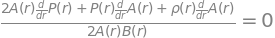

In [16]:
Cons_eqn=sp.Eq((2*A(r)*sp.diff(P(r),r)+P(r)*sp.diff(A(r),r)+rho(r)*sp.diff(A(r),r))/(2*A(r)*B(r)),0)
Cons_eqn

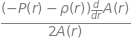

In [17]:
Solution=sp.solve(Cons_eqn,sp.diff(P(r),r))[0]
Solution

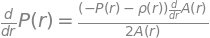

In [18]:
Tov_equation=sp.Eq(sp.diff(P(r),r),Solution)
Tov_equation

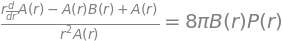

In [19]:
EFE_1=sp.Eq(1/(r**2 * A(r)) * (A(r)-A(r)*B(r) + r*sp.diff(A(r),r)),8*sp.pi*B(r)*P(r))
EFE_1

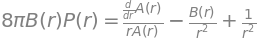

In [20]:
EFE_1=sp.simplify(EFE_1)
EFE_1

In [21]:
Solution_1=sp.solve(EFE_1,sp.diff(A(r),r)/A(r))[0]
Solution_1

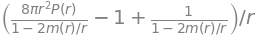

In [22]:
Solution_1=Solution_1.subs(B(r),(1-(2*m(r)/r))**(-1))
Solution_1

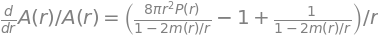

In [23]:
A_prime_divide_A=sp.Eq(sp.diff(A(r),r)/A(r),Solution_1)
A_prime_divide_A

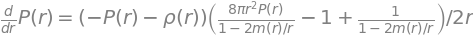

In [24]:
Tov_eq_1=sp.Eq(sp.diff(P(r),r),Tov_equation.rhs.subs(sp.diff(A(r),r)/A(r),Solution_1))
Tov_eq_1

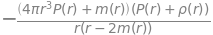

In [25]:
TOV_Equation_rhs=sp.simplify(Tov_eq_1.rhs)
TOV_Equation_rhs

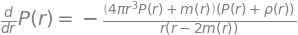

In [26]:
TOV_Equation=sp.Eq(sp.diff(P(r),r),TOV_Equation_rhs)
TOV_Equation